## This notebook

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_pop = pd.read_csv('input_data/covid_county_population_usafacts.csv')
df_deaths = pd.read_csv('input_data/covid_deaths_usafacts.csv')
df_cases = pd.read_csv('input_data/covid_confirmed_usafacts.csv')
df_vax = pd.read_csv('input_data/COVID-19_Vaccinations_in_the_United_States_County.csv')

/home/joanna_len/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
counties_to_analyse = ['Blaine County', 'Twin Falls County', 'Ada County']
fips_to_analyse = [16013, 16083, 16001]

In [68]:
def days_of_months_printer(month, no_days):
    month = "0" * (2-len(str(month))) + str(month)
    list_of_days = list()
    for i in range(1, no_days+1):
        list_of_days.append(month + "/" + "0" * (2-len(str(i))) + str(i) + "/2022")
    return list_of_days

def days_of_months_printer_ww(month, no_days):
    month = "0" * (2-len(str(month))) + str(month)
    list_of_days = list()
    for i in range(1, no_days+1):
        list_of_days.append("2022-" + month + "-" + "0" * (2-len(str(i))) + str(i))
    return list_of_days

In [137]:
days = days_of_months_printer(1, 31) + days_of_months_printer(2, 28) + days_of_months_printer(3, 22)
lst_filter_vax = []
for fips in fips_to_analyse:
    fips_f = '0' * (5 - len(str(fips))) + str(fips)
    lst_filter_vax.extend(df_vax.loc[(df_vax['FIPS'] == fips_f) & (df_vax['Date'].isin(days))].values.tolist())

In [138]:
df_filter_vax = pd.DataFrame(lst_filter_vax, columns = df_vax.columns)
df_filter_vax

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,03/22/2022,16013,12,Blaine County,ID,97.8,21501.0,93.4,21500.0,95.0,...,8.0,8.0,8.0,8.0,8.0,23021.0,21922.0,20109.0,18163.0,4683.0
1,03/21/2022,16013,12,Blaine County,ID,97.8,21499.0,93.4,21498.0,95.0,...,8.0,8.0,8.0,8.0,8.0,23021.0,21922.0,20109.0,18163.0,4683.0
2,03/20/2022,16013,12,Blaine County,ID,97.8,21499.0,93.4,21498.0,95.0,...,8.0,8.0,8.0,8.0,8.0,23021.0,21922.0,20109.0,18163.0,4683.0
3,03/19/2022,16013,11,Blaine County,ID,97.8,21497.0,93.4,21496.0,95.0,...,8.0,8.0,8.0,8.0,8.0,23021.0,21922.0,20109.0,18163.0,4683.0
4,03/18/2022,16013,11,Blaine County,ID,97.8,21492.0,93.4,21491.0,95.0,...,8.0,8.0,8.0,8.0,8.0,23021.0,21922.0,20109.0,18163.0,4683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,01/05/2022,16001,1,Ada County,ID,97.6,289931.0,60.2,NaN,NaN,...,4.0,NaN,NaN,4.0,4.0,481587.0,454456.0,410672.0,369857.0,71958.0
239,01/04/2022,16001,1,Ada County,ID,97.6,289745.0,60.2,NaN,NaN,...,4.0,NaN,NaN,4.0,4.0,481587.0,454456.0,410672.0,369857.0,71958.0
240,01/03/2022,16001,1,Ada County,ID,97.6,289299.0,60.1,NaN,NaN,...,4.0,NaN,NaN,4.0,4.0,481587.0,454456.0,410672.0,369857.0,71958.0
241,01/02/2022,16001,0,Ada County,ID,97.6,289286.0,60.1,NaN,NaN,...,4.0,NaN,NaN,4.0,4.0,481587.0,454456.0,410672.0,369857.0,71958.0


In [139]:
days = days_of_months_printer_ww(1, 31) + days_of_months_printer_ww(2, 28) + days_of_months_printer_ww(3, 22)
col_relevant = ['countyFIPS', 'County Name', 'State'] + days
df_filter_cases = df_cases.loc[(df_cases['countyFIPS'].isin(fips_to_analyse))][col_relevant]

In [140]:
df_filter_cases

,countyFIPS,County Name,State,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,...,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22
564,16001,Ada County,ID,89225,89225,89225,90151,90630,91092,91221,...,131990,132050,132164,132307,132488,132599,132599,132599,132727,132836
570,16013,Blaine County,ID,3540,3540,3540,3713,3780,3953,4025,...,5750,5806,5841,5894,5909,5930,5930,5930,5939,5944
605,16083,Twin Falls County,ID,17042,17042,17042,17119,17185,17294,17337,...,22960,23334,23492,23663,23730,23823,23823,23823,23940,23967


In [215]:
#Blaine
population = df_pop.loc[df_pop['countyFIPS'] == 16013]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16013']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16013][days].values[0])

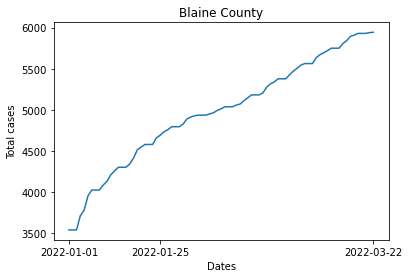

In [217]:
plt.title("Blaine County")
plt.ylabel("Total cases")
plt.xlabel("Dates")
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

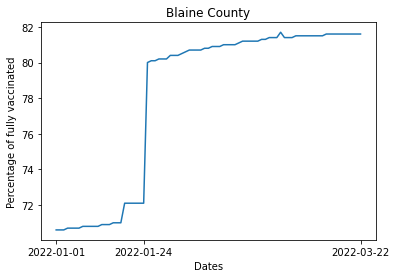

In [218]:
plt.title("Blaine County")
plt.ylabel("Percentage of fully vaccinated")
plt.xlabel("Dates")
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-24', '2022-03-22'])
plt.show()

In [222]:
#Twin Falls County
population = df_pop.loc[df_pop['countyFIPS'] == 16083]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16083']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16083][days].values[0])

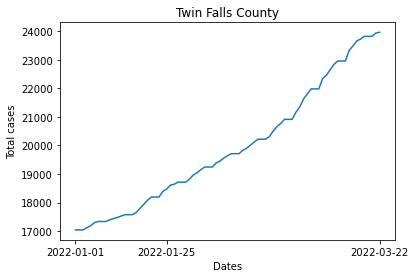

In [223]:
plt.title("Twin Falls County")
plt.ylabel("Total cases")
plt.xlabel("Dates")
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

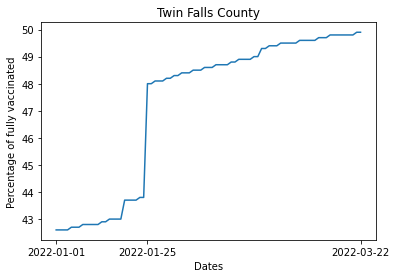

In [224]:
plt.title("Twin Falls County")
plt.ylabel("Percentage of fully vaccinated")
plt.xlabel("Dates")
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

In [225]:
#Ada County
population = df_pop.loc[df_pop['countyFIPS'] == 16001]['population'].values[0]
vax_full = list(df_filter_vax.loc[df_filter_vax['FIPS'] == '16001']['Series_Complete_Pop_Pct'])
vax_full = list(reversed(vax_full))
cases_per_capita = list(df_filter_cases.loc[df_filter_cases['countyFIPS'] == 16001][days].values[0])

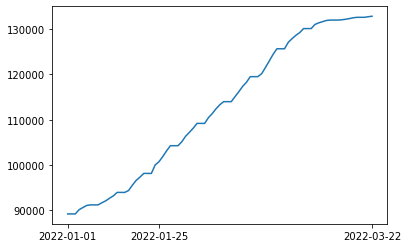

In [226]:
plt.plot(days,cases_per_capita)
plt.xticks(['2022-01-01', '2022-01-25', '2022-03-22'])
plt.show()

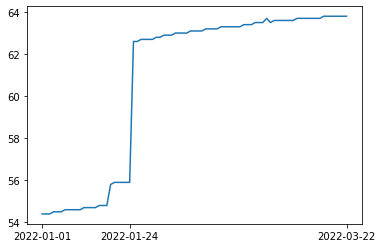

In [227]:
plt.plot(days,vax_full)
plt.xticks(['2022-01-01', '2022-01-24', '2022-03-22'])
plt.show()

In [184]:
len([54.4,
 54.4,
 54.4,
 54.5,
 54.5,
 54.5,
 54.6,
 54.6,
 54.6,
 54.6,
 54.6,
 54.7,
 54.7,
 54.7,
 54.7,
 54.8,
 54.8,
 54.8,
 55.8,
 55.9,
 55.9,
 55.9,
 55.9,
 55.9])

24